In [1]:
import os
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import torch.optim as optim
import cellpylib as cpl
import numpy as np
from torch.utils.tensorboard import SummaryWriter
import sys
from matplotlib import pyplot as plt
import random as rand
from lightcone import PastLightCone

In [2]:
sys.path.append("C:/Users/windows/Research/CA_Project")
from block_entropy import get_block_entropy_feature_matrix, get_block_entropy_feature_vector, block_entropy, mutual_information_feature_vector, get_window_1d

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

## Generate Cellular Automata Spacetime to Segment

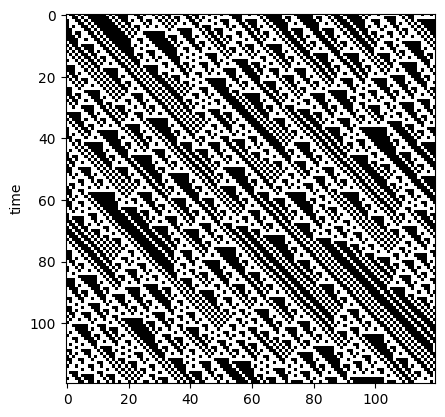

In [3]:
ca_size = 120
rule_number = 225

ic = cpl.init_random(ca_size)
ca = cpl.evolve(ic, timesteps=ca_size+3, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule_number), memoize=True)

# remove tranients
ca = ca[3:]

cpl.plot(ca)

## Get past lightcone data

In [4]:
rand_x, rand_t = rand.randint(0, ca_size), rand.randint(0, ca_size)
print(rand_x)
print(rand_t)

29
54


In [6]:
lc_past = PastLightCone(horizon=2)
lc_past.get_lightcone_realization(ca, rand_x, rand_t)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [7]:
lc_past.d_internal

tensor([0.0000, 1.4142, 1.0000, 1.4142, 2.8284, 2.2361, 2.0000, 2.2361, 2.8284])

In [ ]:
np.abs(-2)

In [ ]:
d_internal = torch.zeros((self.horizon + 1) ** 2)
        index = 0
        for delta in range(self.horizon + 1):
            spatial_length = 2 * self.horizon + 1 - 2 * (self.horizon - delta)
            for j in range(spatial_length):
                sigma = np.abs(j - (spatial_length - 1))
                d_internal[index] = np.sqrt(sigma ** 2 + delta ** 2)
                index += 1

## Perform K-Means Clustering on Past Lightcones

## Get Future Lightcone Data

## Perform K-Means Clustering on Future Lightcones

Now we will have a finite set of past light cones and a finite set of future light cones

I am confused on how to go about it after this